# Clustering - without Normalize

K-means

The k-means algorithm is very simple and basically consists of two steps. It is initialized by a random choice of cluster centres, e.g. a random selection of objects in the data set or random values within the range for each variable. The steps are:
1.	Pick an initial set of K centroids (this can be random or any other means)
2.	For each data point, assign it to the member of the closest centroid according to the given distance function
3.	Adjust the centroid position as the mean of all its assigned member data points. Go back to (2) until the membership isn't change and centroid position is stable.
4.	Output the centroids.
In this part, we want to show how to use K-means in R through few examples (codes are provided in blue colour). Make sure that you have installed the appropriate packages before calling them via the library command. 


In [1]:
library(datasets)

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In this example, we assign the data from column 1-4 (features) to variable x, and the class column to variable y. Remember, the first 4 input variables are the attributes/features for this specific dataset. The 5th input represents the output class.

In [4]:
x = iris[1:4]     # here the x now contains only the first 4 columns, as the 5th has been omitted. 
y = iris$Species  #the $ sign is associated with the label of that particular column 

In [5]:
head(x)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [6]:
kc <- kmeans(x,3)

In [7]:
kc

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [8]:
table(y,kc$cluster)  

            
y             1  2  3
  setosa      0 50  0
  versicolor 48  0  2
  virginica  14  0 36

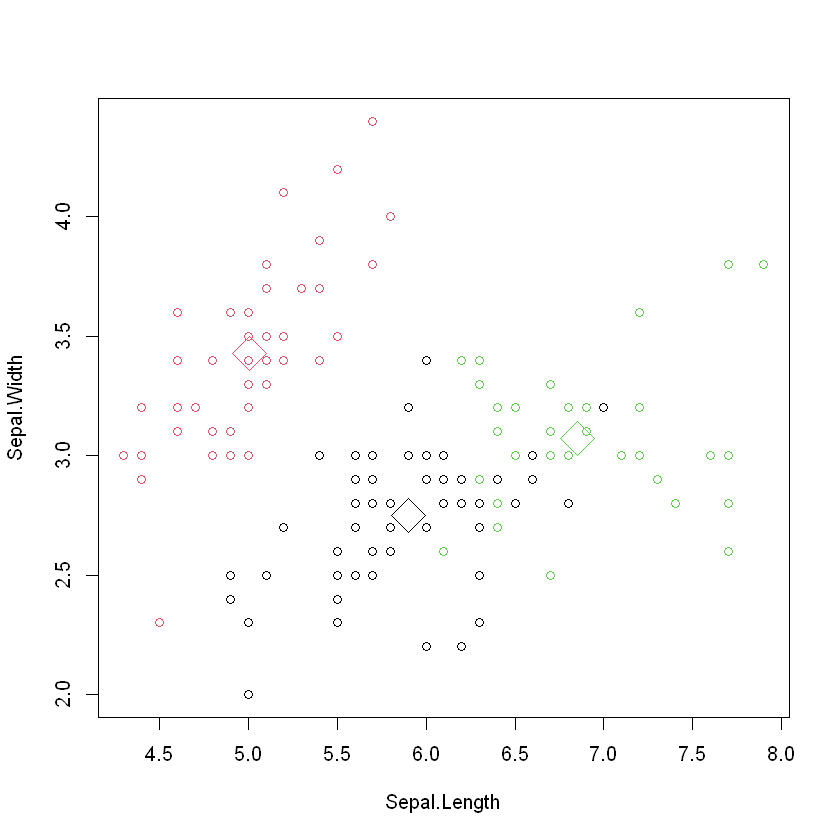

In [9]:
plot(x[c("Sepal.Length", "Sepal.Width")], col=kc$cluster)
points(kc$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=23, cex=3)

# Clustering after Z- score normalize

In [10]:
z_score = function(x) {
  return((x - mean(x)) / sd(x))
}

In [11]:
dfNorm <- as.data.frame(lapply(iris[1:4], z_score))
head(dfNorm)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8976739,1.01560199,-1.335752,-1.311052
2,-1.1392005,-0.13153881,-1.335752,-1.311052
3,-1.3807271,0.32731751,-1.392399,-1.311052
4,-1.5014904,0.09788935,-1.279104,-1.311052
5,-1.0184372,1.24503015,-1.335752,-1.311052
6,-0.5353840,1.93331463,-1.165809,-1.048667


In [12]:
x=dfNorm
y=iris$Species

In [13]:
head(x)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.8976739,1.01560199,-1.335752,-1.311052
2,-1.1392005,-0.13153881,-1.335752,-1.311052
3,-1.3807271,0.32731751,-1.392399,-1.311052
4,-1.5014904,0.09788935,-1.279104,-1.311052
5,-1.0184372,1.24503015,-1.335752,-1.311052
6,-0.5353840,1.93331463,-1.165809,-1.048667


In [14]:
kc =  kmeans(x,3)

In [18]:
kc

K-means clustering with 3 clusters of sizes 47, 50, 53

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1   1.13217737  0.08812645    0.9928284   1.0141287
2  -1.01119138  0.85041372   -1.3006301  -1.2507035
3  -0.05005221 -0.88042696    0.3465767   0.2805873

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 3 3 3 1 3 3 3 3 3 3 3 3 1 3 3 3 3 1 3 3 3
 [75] 3 1 1 1 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1
[112] 1 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 1 1 1 1 1 1 3 3 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 1 3

Within cluster sum of squares by cluster:
[1] 47.45019 47.35062 44.08754
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [16]:
table(y,kc$cluster)

            
y             1  2  3
  setosa      0 50  0
  versicolor 11  0 39
  virginica  36  0 14

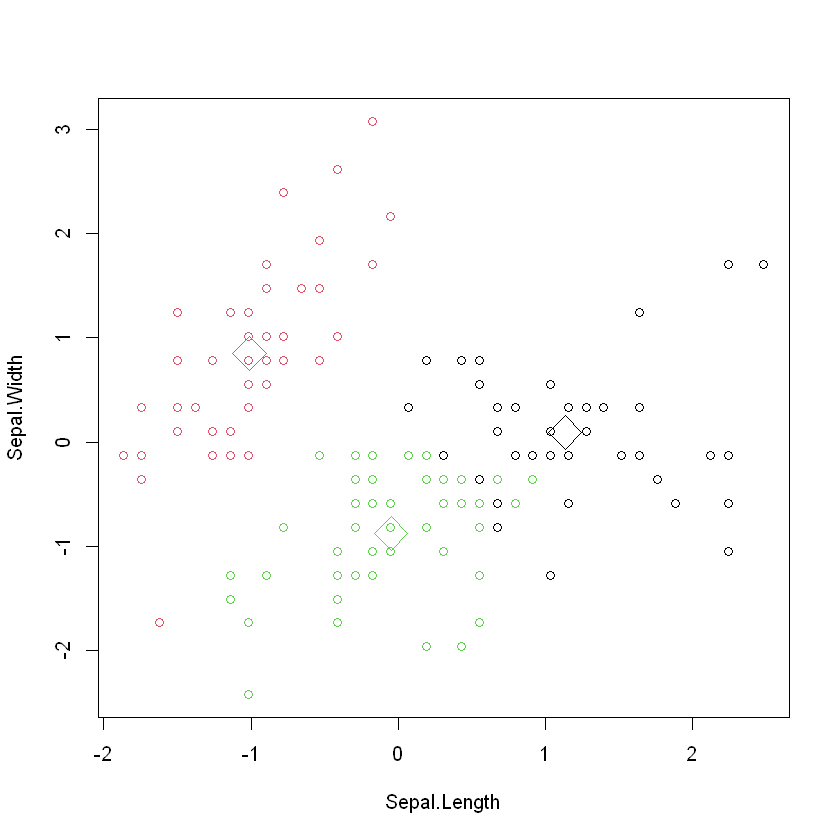

In [17]:
plot(x[c("Sepal.Length", "Sepal.Width")], col=kc$cluster)
points(kc$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=23, cex=3)